In [1]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split

time_multiplicator = 100

class Neuron:
    def __init__(self, input_size, initial_lr, max_steps):
        self.weights = sum(np.random.randn(input_size))
        self.bias = np.random.randn()
        self.initial_lr = initial_lr
        self.max_steps = max_steps
        self.current_step = 0

    def activation(self, x, fun='log'):
        if fun == 'log':
            return np.log(1 + np.exp(x))
        
        if fun == 'Heavyside':
            if np.average(x) < 0:
                for i in range(len(x)):
                    x[i] = 0
                return(x)
            elif np.average(x) >= 0:
                for i in range(len(x)):
                    x[i] = 1
                return(x)
            
        if fun == 'sin':
            return np.sin(x)
        
        if fun == 'tahn':
            return np.tanh(x)
        
        if fun == 'sign':
            return np.sign(x)
        
        if fun == 'ReLu':
            return np.where(x > 0, x, 0)
        
        if fun == 'leakyReLu':
            alpha = 0.01
            return np.where(x >= 0, x, alpha * x)
        
    def learning_rate(self):
        angle = (self.current_step / self.max_steps) * np.pi
        return self.initial_lr * (np.cos(angle) + 1) / 2

    def train(self, inputs, target):
        for i in range(len(inputs)):
            z = np.dot(inputs[i], self.weights) + self.bias
            a = self.activation(z)
            error = a - target[i]
            
            lr = self.learning_rate()
            delta_w = -lr * error * inputs[i]
            delta_b = -lr * error
            
            self.weights += delta_w
            self.bias += delta_b
        
        self.current_step += 1
        
    def predict(self, inputs, fun):
        predictions = []
        for i in inputs:
            z = (i @ self.weights) + self.bias
            a = self.activation(z, fun)
            b = sum(a)
            if b >= 0.5:
                predictions.append(1)
            else: 
                predictions.append(0) 
        return(predictions)

In [2]:
X, Y = datasets.make_classification(n_samples=2200, random_state=222720, n_redundant=0, n_classes=2, n_clusters_per_class=1, n_features=2)
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
train_X , test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=222720)

neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)

In [3]:
def display_model(my,X_tr, X_te, y_tr, y_te, fun):
    my_time = time.perf_counter()
    for i in range(time_multiplicator):
        my.train(X_tr,y_tr)
    my_time = (time.perf_counter() - my_time)/time_multiplicator

    my_pred = my.predict(test_X, fun)

    fig, axs = plt.subplots(3, 1,figsize=(8,12))

    mesh = np.meshgrid(np.arange(0, 1.1, 0.01), np.arange(0, 1.1, 0.01))[0]
    my_predict = np.array(my.predict(np.c_[mesh.ravel(), mesh.T.ravel()], fun)).reshape(mesh.shape)

    axs[0].set_title(str(fun))
    axs[0].contourf(mesh, mesh.T, my_predict, alpha=0.2)
    axs[0].scatter(X_te[:, 0], X_te[:, 1], c=y_te, alpha=0.5)
    axs[0].scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, alpha=0.2)

    my_cm = metrics.confusion_matrix(y_te, my_pred)
    my_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=my_cm)
    my_disp.plot(ax=axs[1])
    my_disp.ax_.set_ylabel('')

    fpr, tpr, thresholds = metrics.roc_curve(y_te, my.predict(test_X, fun))
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='własna implementacja')
    display.plot(ax=axs[2])

    print('               | Własna')
    print(f'Czułość       |{my_cm[0][0]/(my_cm[0][0]+my_cm[1][0]):.4f}')
    print(f'Specyficzność |{my_cm[1][1]/(my_cm[0][0]+my_cm[1][1]):.4f}')
    print(f'Celność       |{metrics.accuracy_score(my_pred, test_Y):.4f}')
    print(f'Czas wykonania|{my_time:.2E}')

               | Własna
Czułość       |0.9745
Specyficzność |0.5353
Celność       |0.9341
Czas wykonania|1.45E-02


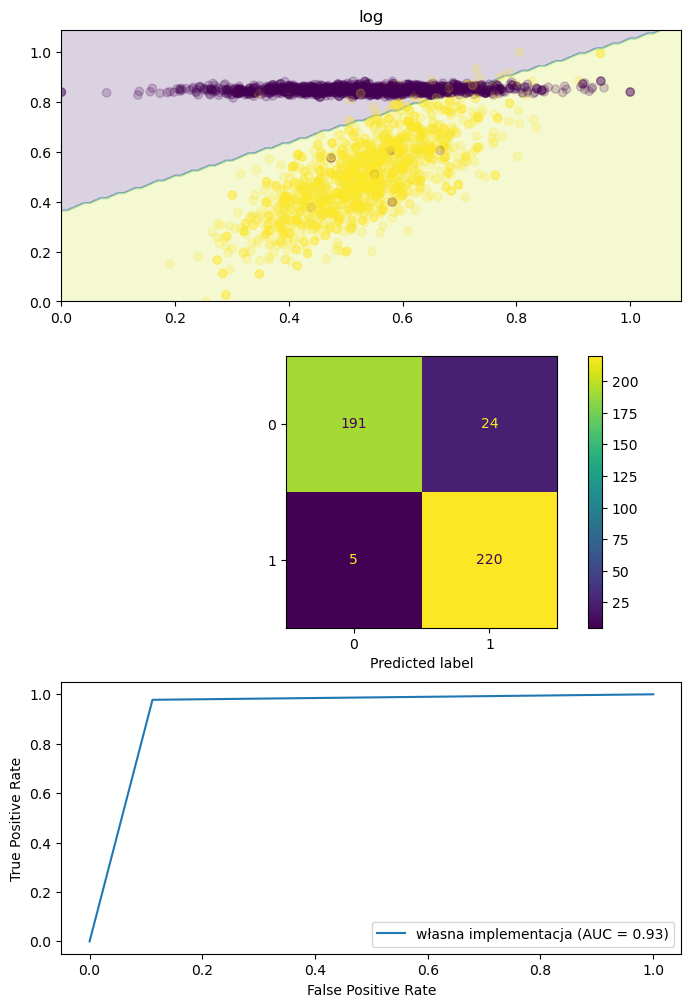

In [4]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'log')

               | Własna
Czułość       |0.6948
Specyficzność |0.3797
Celność       |0.7841
Czas wykonania|1.49E-02


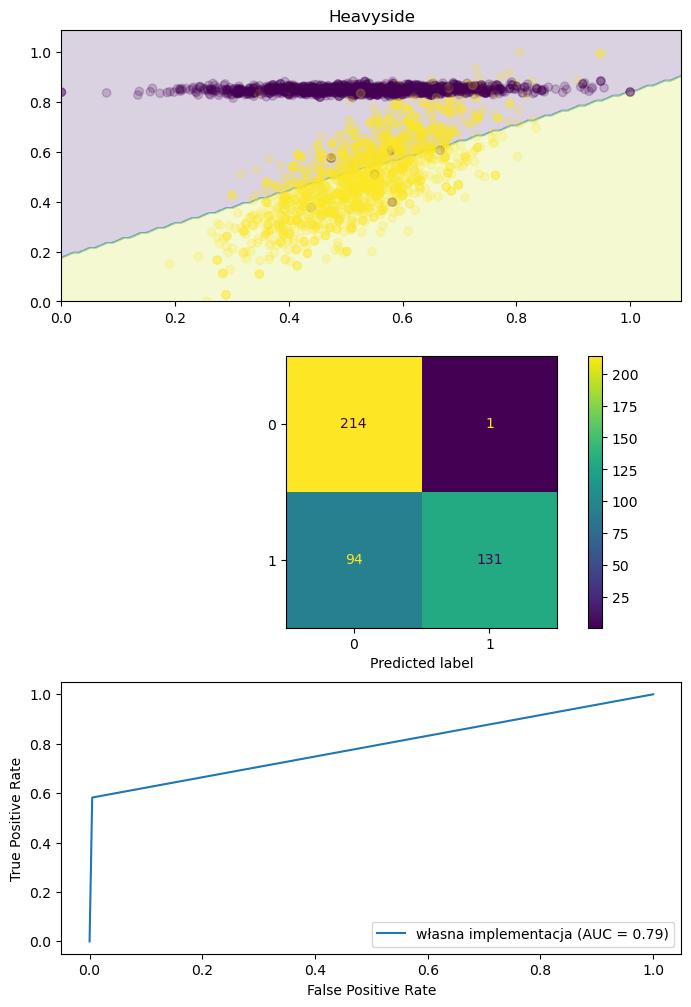

In [5]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'Heavyside')

               | Własna
Czułość       |0.6446
Specyficzność |0.3333
Celność       |0.7295
Czas wykonania|1.48E-02


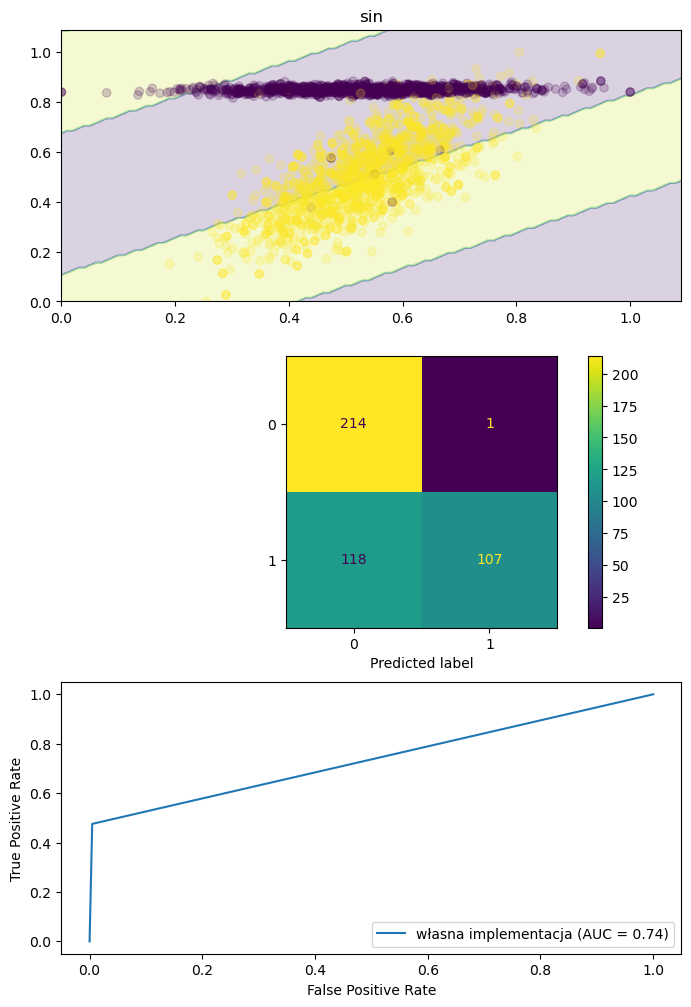

In [6]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'sin')

               | Własna
Czułość       |0.6446
Specyficzność |0.3333
Celność       |0.7295
Czas wykonania|1.47E-02


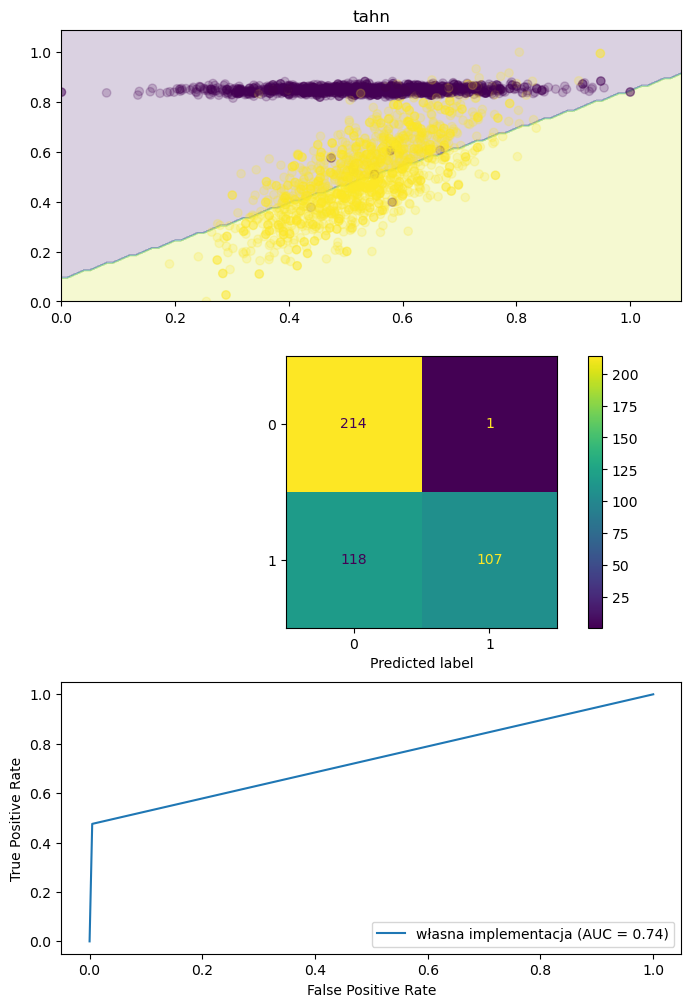

In [7]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'tahn')

               | Własna
Czułość       |0.6906
Specyficzność |0.3801
Celność       |0.7773
Czas wykonania|1.49E-02


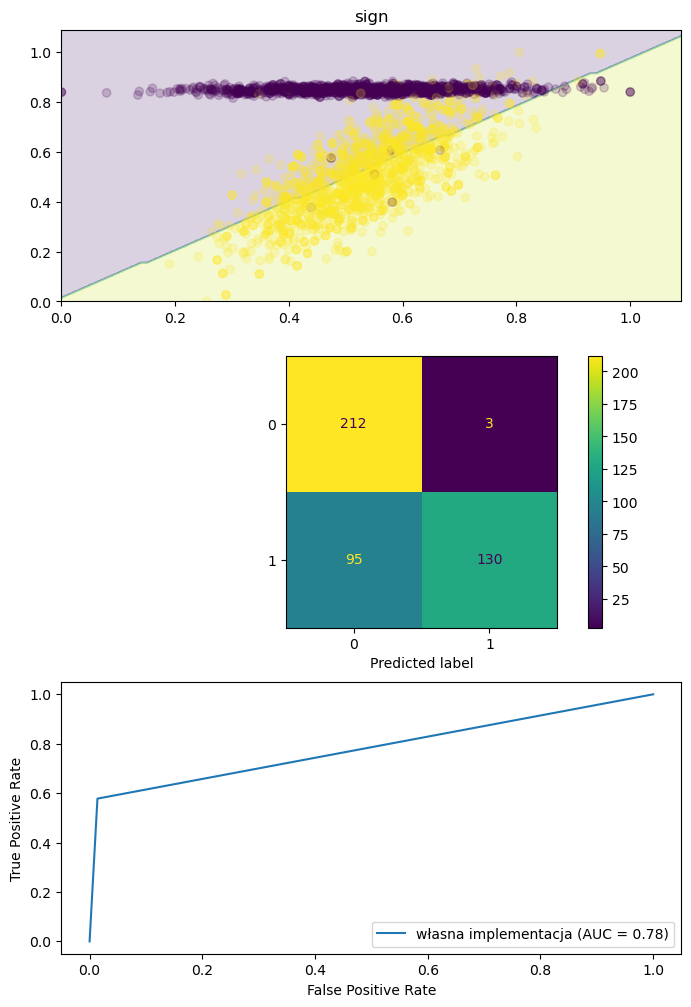

In [8]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'sign')

               | Własna
Czułość       |0.6476
Specyficzność |0.3344
Celność       |0.7341
Czas wykonania|1.52E-02


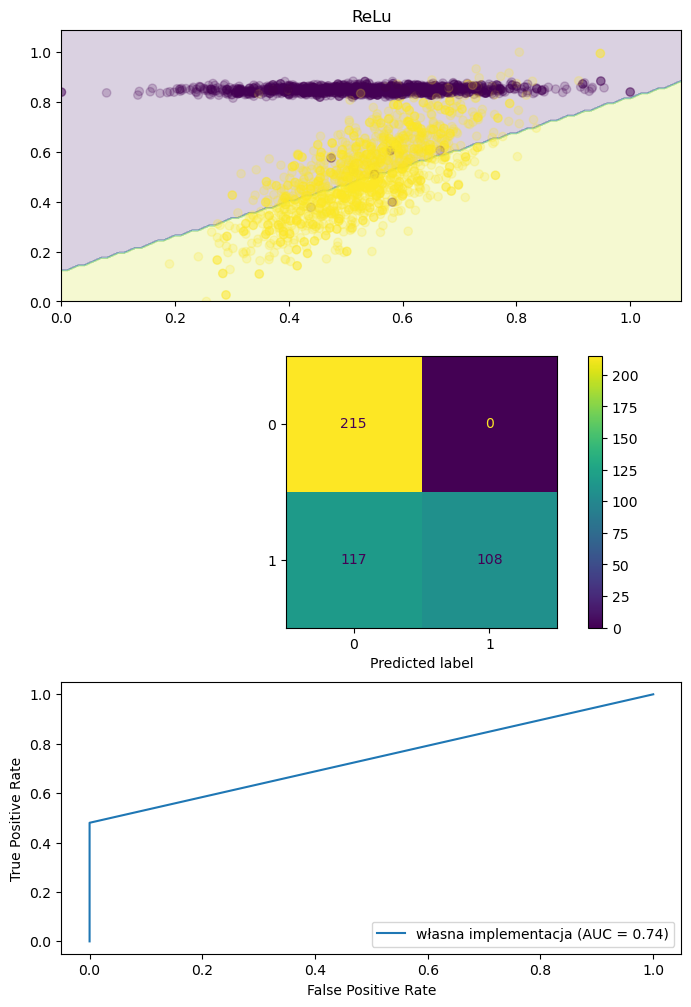

In [9]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'ReLu')

               | Własna
Czułość       |0.6456
Specyficzność |0.3323
Celność       |0.7318
Czas wykonania|1.46E-02


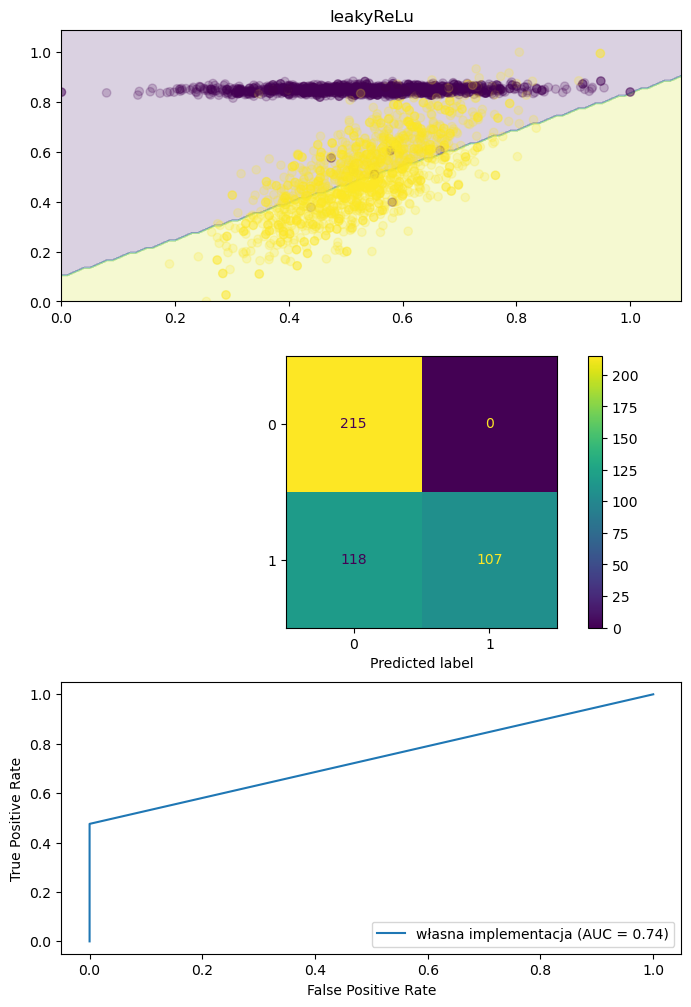

In [10]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'leakyReLu')

In [11]:
moons, moons_c = datasets.make_moons(n_samples=2220, noise = 0.1, random_state=222720)
moons = scaler.fit_transform(moons)
train_X , test_X, train_Y, test_Y = train_test_split(moons, moons_c, test_size=0.2, random_state=0)


               | Własna
Czułość       |0.9171
Specyficzność |0.5462
Celność       |0.8784
Czas wykonania|1.49E-02


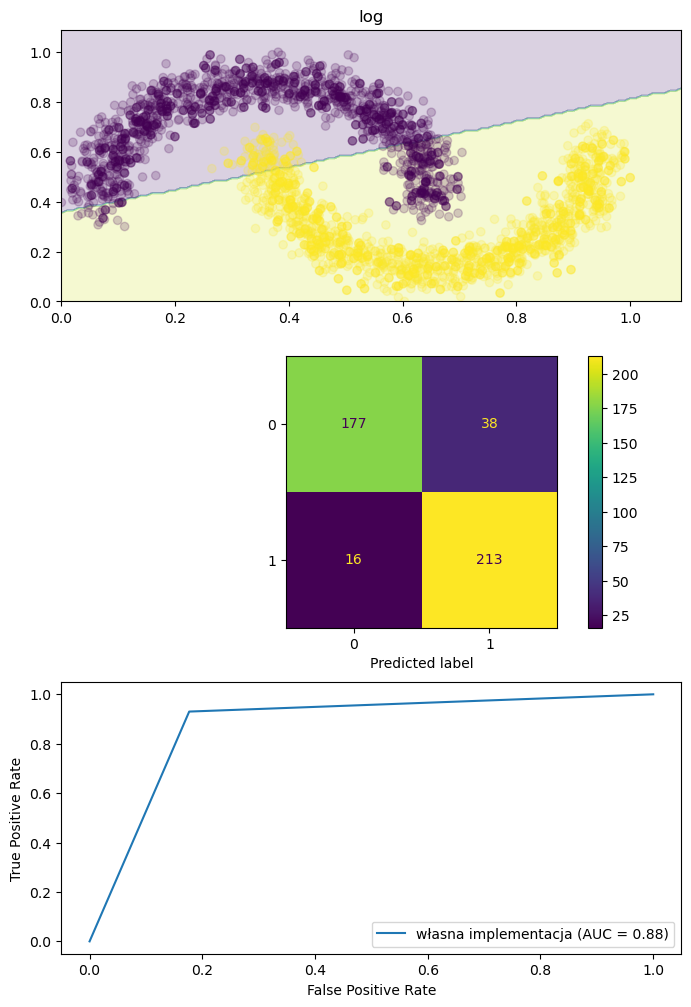

In [12]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'log')

               | Własna
Czułość       |0.7119
Specyficzność |0.3978
Celność       |0.8041
Czas wykonania|1.52E-02


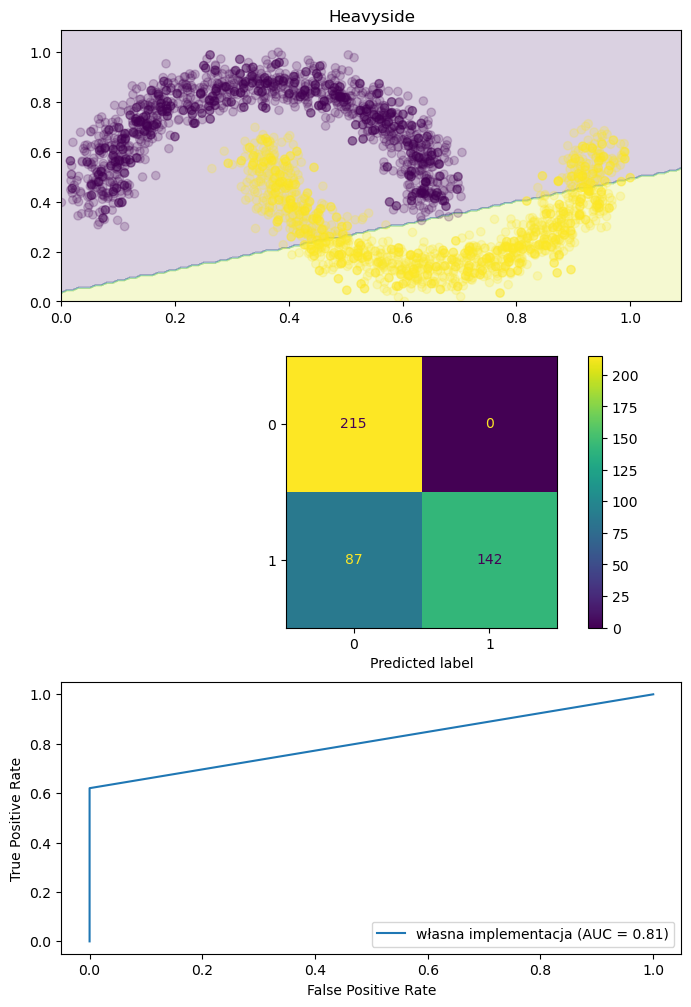

In [13]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'Heavyside')

               | Własna
Czułość       |0.6656
Specyficzność |0.3601
Celność       |0.7568
Czas wykonania|1.50E-02


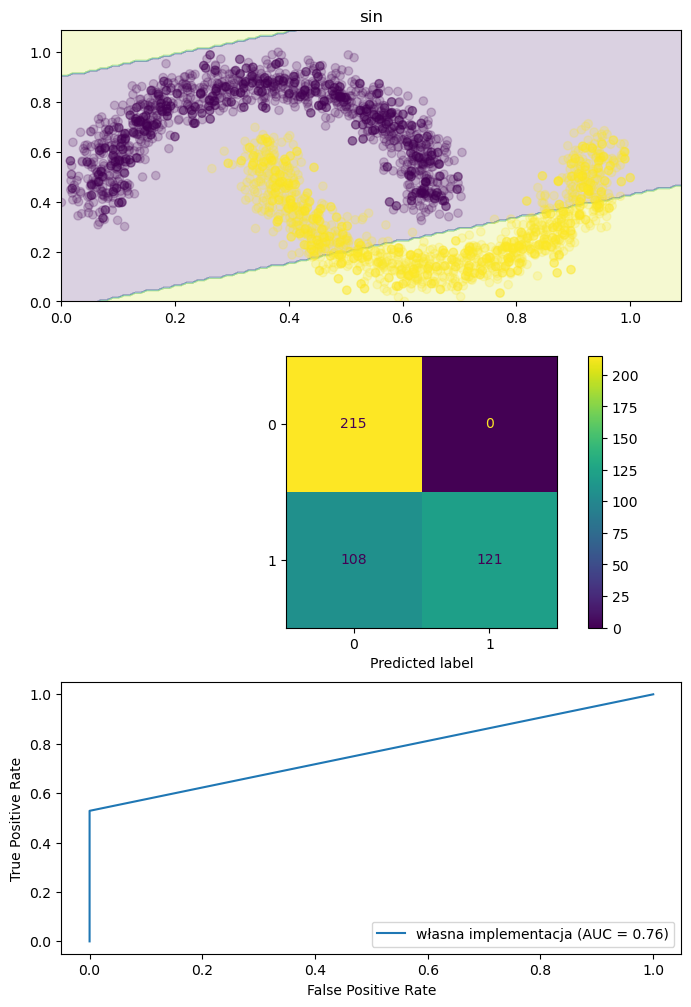

In [14]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'sin')

               | Własna
Czułość       |0.6656
Specyficzność |0.3601
Celność       |0.7568
Czas wykonania|1.51E-02


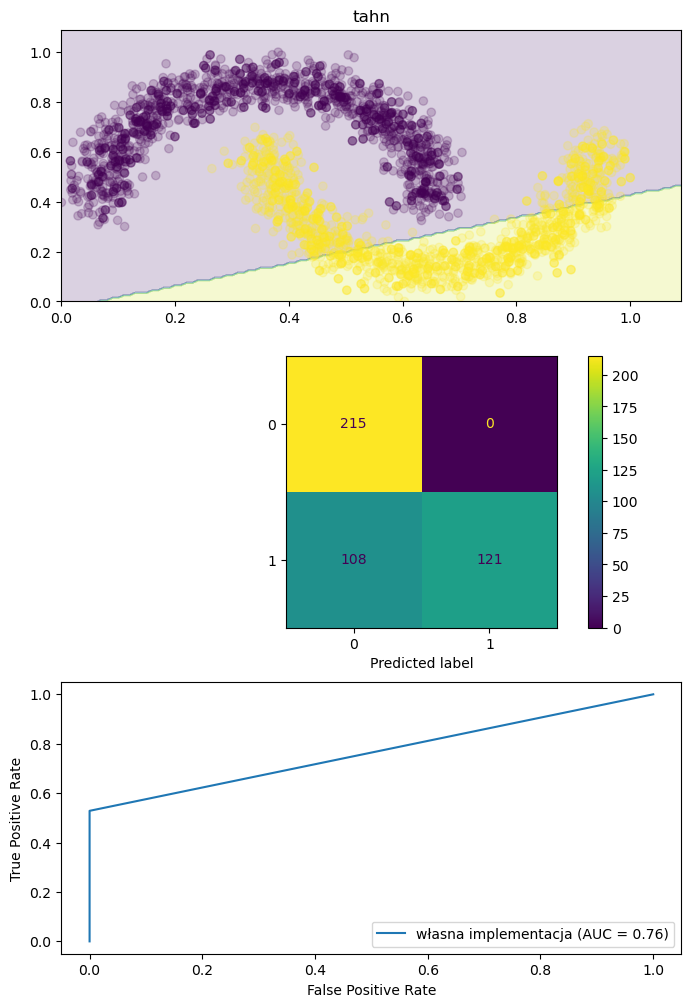

In [15]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'tahn')

               | Własna
Czułość       |0.7119
Specyficzność |0.3978
Celność       |0.8041
Czas wykonania|1.51E-02


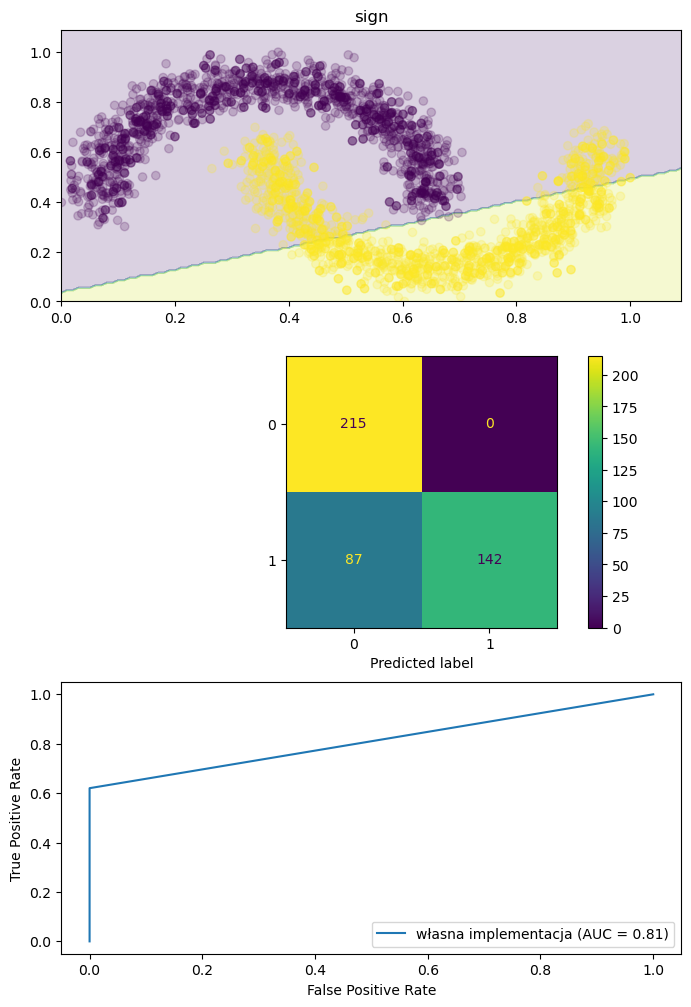

In [16]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'sign')

               | Własna
Czułość       |0.6656
Specyficzność |0.3601
Celność       |0.7568
Czas wykonania|1.55E-02


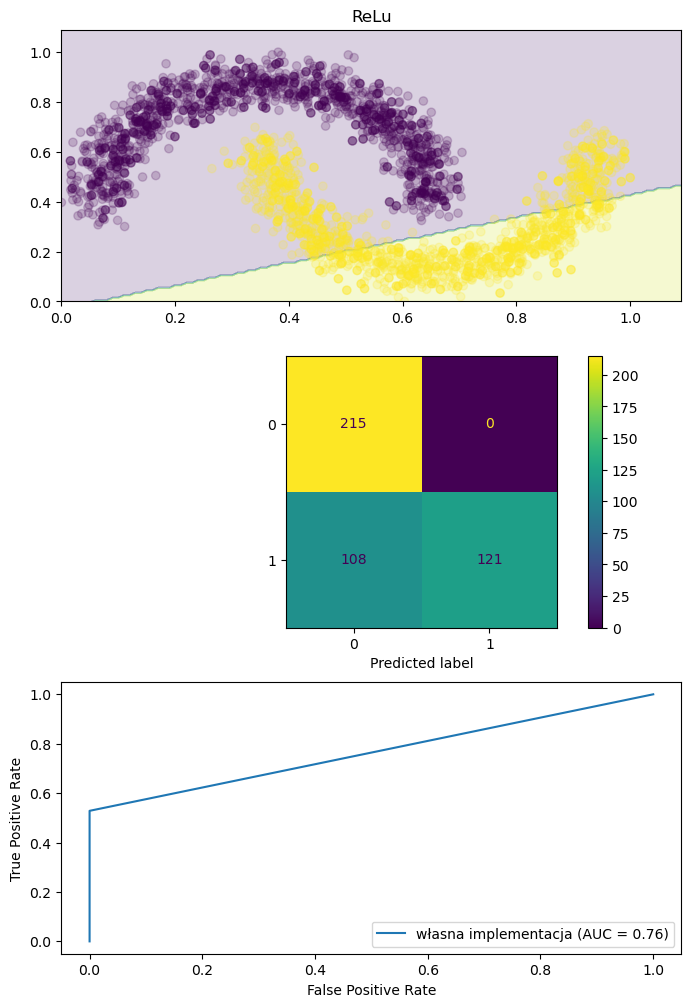

In [17]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'ReLu')

               | Własna
Czułość       |0.6656
Specyficzność |0.3601
Celność       |0.7568
Czas wykonania|1.52E-02


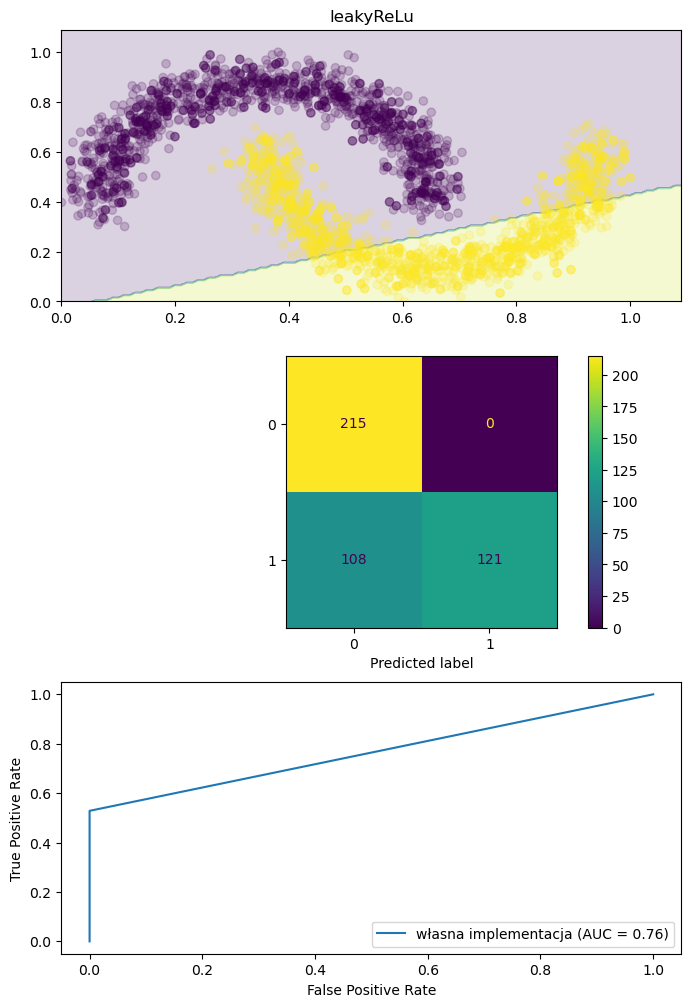

In [18]:
neuron = Neuron(input_size=len(train_X), initial_lr=0.01, max_steps=1000)
display_model(neuron, train_X, test_X, train_Y, test_Y, 'leakyReLu')